# Predictive Analytics for Global Cancer Care

In [41]:
# Loading the Dataset and Important libraries in the Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore') 
data = pd.read_csv('global_cancer_patients_2015_2024.csv')
print("Lenght and Breath of the Dataset : ",data.shape)
data

In [3]:
# Checking the structure of the Dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
# Checking the Duplicates in the Dataset
print(data.duplicated().sum())    
print("No Duplicates Found")

0
No Duplicates Found


### Exploratory Data Analysis

Analysing the Data column by column

In [5]:
# Statistical Summary of the 'Age' Column
data['Age'].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

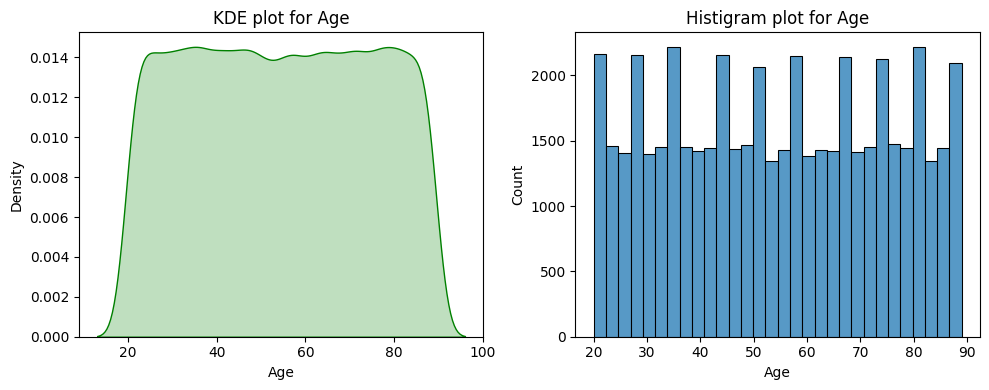

In [103]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
sns.kdeplot(x=data['Age'], fill = True,color= 'green')
plt.title('KDE plot for Age')
plt.subplot(1,2,2)
sns.histplot(x=data['Age'],bins= 30)
plt.title('Histigram plot for Age')
plt.tight_layout()
plt.show()


Some of the basic statistical analysis from age column:
Range : From 20 to  89 <br>
Standard Deviation : 20.22 <br>
Mean : 54.42 <br>
This above two charts indicates the data is normally distributed and have a very board representaion. It is not skewed towards one age category and very suitable for age-based comparative analysis. 

In [19]:
# Statistical Summary of the 'Gender' Column
data['Gender'].describe()

count     50000
unique        3
top        Male
freq      16796
Name: Gender, dtype: object

In [22]:
genderPdata['Gender'].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

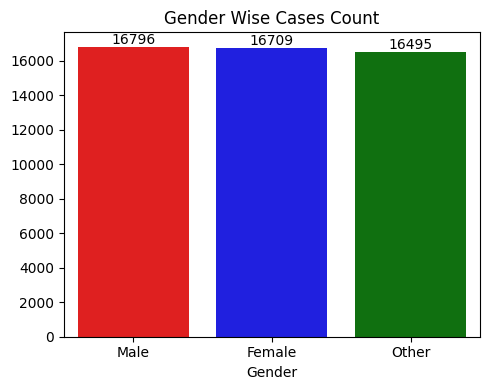

In [74]:
plt.figure(figsize= (5,4))
sns.barplot(x = data['Gender'].value_counts().index,
            y = data['Gender'].value_counts().values,
           palette = ['red', 'blue','green'])

for i,v in enumerate(data['Gender'].value_counts()):
    plt.text(i,v,str(v),ha= 'center',va= "bottom")
plt.title('Gender Wise Cases Count')
plt.tight_layout()

plt.show()

Gender column contains three major catogories - Male, Female and Other <br>
Also all the gender have almost same values. So it is very compatible for Gender specific Analysis.

In [55]:
# Analysing Country column
data['Country_Region'].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

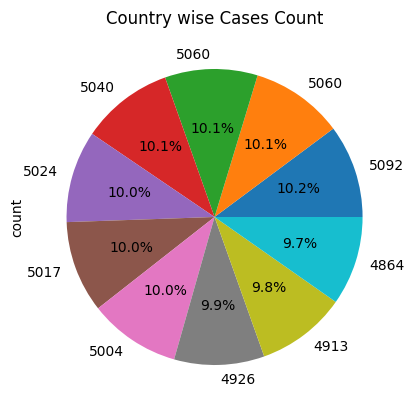

In [73]:
plt.figure(figsize = (5,4))
data['Country_Region'].value_counts().plot(kind= 'pie',labels = data['Country_Region'].value_counts().values,autopct = '%1.1f%%')
plt.tight_layout()
plt.title('Country wise Cases Count')
plt.show()

Australia has the highest number of Patients. I have lot of varition in terms of country (data avialable for 10 different country). Count of each country is appox. the same.

In [71]:
# Analysing column named Cancer_Type
data['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

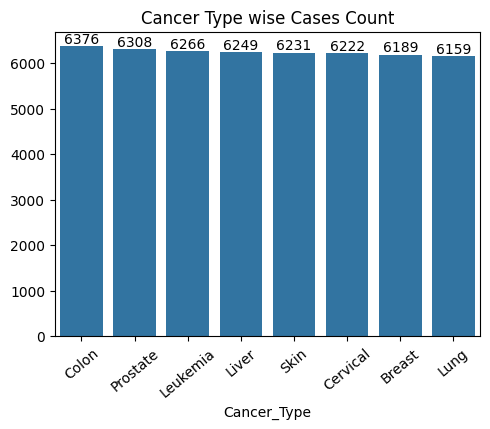

In [87]:
plt.figure(figsize= (5,4))
sns.barplot(x =data['Cancer_Type'].value_counts().index,
            y = data['Cancer_Type'].value_counts().values)

for x,y in enumerate(data['Cancer_Type'].value_counts().values):
    plt.text(x,y,str(y), ha = 'center',va = 'bottom')
plt.title("Cancer Type wise Cases Count")
plt.tight_layout()
plt.xticks(list(data['Cancer_Type'].value_counts().index),rotation=40)
plt.show()

We have in total 8 eight tyoe of Cancer, having approx. same number of value Counts. <br> As per the data the most common Cancer Type is Colon followed by Prostate and Leukemia 

In [88]:
# Analysing column named Cancer_Stage
data['Cancer_Stage'].value_counts()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

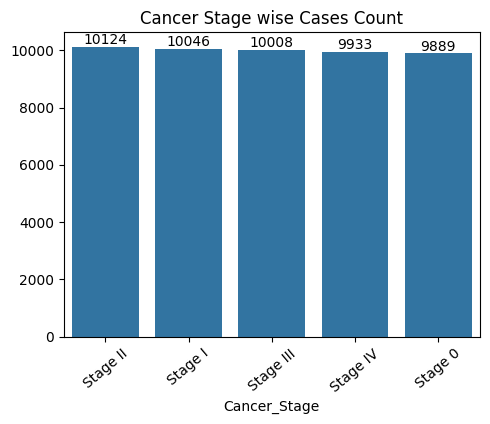

In [89]:
plt.figure(figsize= (5,4))
sns.barplot(x =data['Cancer_Stage'].value_counts().index,
            y = data['Cancer_Stage'].value_counts().values)

for x,y in enumerate(data['Cancer_Stage'].value_counts().values):
    plt.text(x,y,str(y), ha = 'center',va = 'bottom')
plt.title("Cancer Stage wise Cases Count")
plt.tight_layout()
plt.xticks(list(data['Cancer_Stage'].value_counts().index),rotation=40)
plt.show()

Thier are 5 type of Stages type in our data with values ranging form 0 to 4. Again, each stage have approx. same number of counts  <br>
Most comman stages are stage II and I.

In [91]:
data['Treatment_Cost_USD'].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

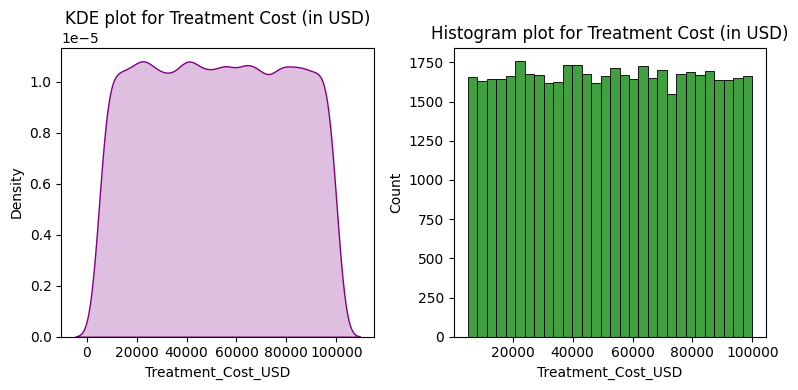

In [106]:
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.title('KDE plot for Treatment Cost (in USD)')
sns.kdeplot(data['Treatment_Cost_USD'], fill = True, color = 'purple')
plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'], bins = 30 ,color = 'green')
plt.title('Histogram plot for Treatment Cost (in USD)')
plt.tight_layout()
plt.show()

Treatment Cost (in USD) have no Skewness, their are approx. similar count of the under each bins (as refered from histogram) 

In [108]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [115]:
cancer_causes_  = ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
data[data_of_interest].agg(['mean', 'std','max','min',])

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
max,10.000000,10.000000,10.000000,10.000000,10.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000


These variables have almost the same average values and spread, which means they were probably measured using the same scale. They are important because they help us study how different factors like genetic risk and smoking work together to affect survival.